# Section 3 Talking to the Internet

We are ready to get into one of the main goals of this program. How to interact with the rest of the world across the internet using code. This skill is used across many areas of software engineering. We'll start with a high level look at how we share information across the internet, then get into some specific examples of requesting data.

## How We Request Data

There is a lot that can be said about how the internet works and how we can request something from out on the internet and how a response is sent back. For the purpose of this program we will just talk about the pieces needed to write code to get what we need from the internet.

### Anatomy of a URL

The first part we need to talk about is what a URL is made up of. It shows up at the top of your browser, but you may not have considered what the different elements mean.

Below is a break down of an example URL. The URL is what you get if you Google "Where do elephants live".

```
https://www.google.com/search?q=where+do+elephants+live&oq=where+do+elephant&aqs=chrome.0.0i512j69i57j0i512l8.3715j1j7&sourceid=chrome&ie=UTF-8
```

The general format is as follows.

```
<protocol>://<domain name>/<path>?<parameters>
```

#### Protocol

```
https://
```

This is the means that communication will take place between the client (in this case the browser) and the server (Google's hardware in this case). The protocols we will use are HTTP and HTTPS. HTTPS is the secure version of HTTP, but for our discussion we can largely treat them the same.

#### Domain Name

```
google.com
```

This is the entity you are trying to talk to. In this case its Google. Entities by domain names that then route back to their servers. The domain name is used to determine what server needs to be talked through.

#### Path

```
/search
```

The path specified a specific resource you are requesting. The exact meaning of the path is determined by the server so the only way to find out what path's to use is to go through the server itself. Usually this is handled view buttons on websites that do the navigation through the paths for us. Next time you are on a website and are clicking around, see how the path changes.

#### Parameters

```
q=where+do+elephants+live&oq=where+do+elephant&aqs=chrome.0.0i512j69i57j0i512l8.3715j1j7&sourceid=chrome&ie=UTF-8
```

Parameters are other pieces of information that are sent to the server that allow the server the information it needs to complete the request (kinda like parameters in Python functions). Parameters come after the question mark and are key-value pairs. `&` is used to seperate the different parameters. In the example above the following parameters are in the URL.

| Key        | Value                                   |
|------------|-----------------------------------------|
| `q`        | `where+do+elephants+live`               |
| `oq`       | `where+do+elephant`                     |
| `aqs`      | `chrome.0.0i512j69i57j0i512l8.3715j1j7` |
| `sourceid` | `chrome`                                |
| `ie`       | `UTF-8`                                 |

This isn't all of the information that is sent by the browser, we will discuss later how additional information is sent across the internet.

The key take aways is that URLs are structured following a pattern and later on we will use this pattern to make more pointed requests.

### Request Types

When making HTTP requests, where is a verb associated with each request. That verb is used to describe the kind of request you are making. Below are listed the main request types and their uses.

| Operation | Use                                           | Example                          |
|-----------|-----------------------------------------------|----------------------------------|
| GET       | Request information from the server           | Searching something on Google    |
| POST      | Making new information to store on the server | Creating a new post on instagram |
| PUT       | Making changes to existing data               | Editing a slack message          |
| DELETE    | Remove a piece of information                 | Deleting a post on instagram     |

There are other request methods supported by HTTP, but these are the main ones we will work with. Something tricky with these request methods is that they are mostly suggestions on how they are used. One server may not use `PUT` but use `POST` for any request requiring changing data.

### HTTP Response Codes

When making HTTP requests, you will get a response code from the server that details the success/failure of the request. A code you may be familiar with is `404` which is used when the resource you are looking for is not found. There are tons of different codes so we wont look at all of them. However they are helpfully broken up into classes.

HTTP response codes are just numbers so to figure out what exactly a specific code means you will need to look it up.

| Class                  | Code Range | Purpose|
|------------------------|------------|-------------------------------------------------------------------|
| Information Responses  | 100-109    | Give user information on a request                                |
| Successful Responses   | 200-299    | Descibe requests that where a success                             |
| Client Error Responses | 400-499    | Provide information on why your request was invalid               |
| Server Error Responses | 500-599    | Provide information on why the server failed to make your request |

Credit [Mozilla](https://developer.mozilla.org/en-US/docs/Web/HTTP)

My personal favorite HTTP code is `418`.


## Making Requests in Python

Now that we've seen how HTTP requests work in the context of our browser, lets see how we you make requests using Python. The easies way is with a package (a library written by some user/organization) called `requests`. Below is a snippet of Python code that makes the same Google search as above, but in Python.

The HTTP status code of the GET request was: 200


The response body is: <!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>where do elephants live - Google Search</title><script nonce="uZeXyzKjhktmNBpJQg1ABA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.ws
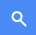
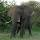

In [6]:
import requests

result = requests.get('https://www.google.com/search?q=where+do+elephants+live&oq=where+do+elephant&aqs=chrome.0.0i512j69i57j0i512l8.3715j1j7&sourceid=chrome&ie=UTF-8')

status_code = result.status_code
print('The HTTP status code of the GET request was: {}\n\n'.format(status_code))

# The next lines print 
result_body = result.text
print('The response body is: {}'.format(result_body))


What is up with the response body?

## Program Friendly Format

So we saw that simply making the request does not give us something that is easy to work with in Python. Luckily there are formats designed for talking across the internet and digesting that information in a computer friendly way. The format we will talk about the most is JSON (Javascript Option Notation). JSON is a format of representing data as key value pairs. Below is an example JSON object to describe a person.

```json
{
    "name": "Collin Bolles",
    "age": 23,
    "occupation": "Software Engineer"
}
```

What data type in Python have we talked about that is closest to JSON?

## REST API

So we now know we can't just make requests to any server and expect to get back data that is easy for us to parse. These such endpoints are typicalled referred to as REST APIs.

There are TONS of REST APIs out there that range in capabilities. Take a second a check out [this list](https://github.com/public-apis/public-apis) of just some of the free APIs that exist.

For this section we will be using PokéAPI, a free to use API on Pokémon. Its a very conprehensive API and a good starting point.

Lets first apply what we've already learned about URLs to analyze the URL below.

```
https://pokeapi.co/api/v2/pokemon/charmander
```

Now lets make our request using the URL above.

In [10]:
result = requests.get('https://pokeapi.co/api/v2/pokemon/charmander')
print(result.json())

{'abilities': [{'ability': {'name': 'blaze', 'url': 'https://pokeapi.co/api/v2/ability/66/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'solar-power', 'url': 'https://pokeapi.co/api/v2/ability/94/'}, 'is_hidden': True, 'slot': 3}], 'base_experience': 62, 'forms': [{'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon-form/4/'}], 'game_indices': [{'game_index': 176, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 176, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 176, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 4, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 4, 'version': {'name': 'silver', 'url': 'https://pokeapi.co/api/v2/version/5/'}}, {'game_index': 4, 'version': {'name': 'crystal', 'url': 'https://pokeapi.co/api/v2/version/6/'}}, {'game_index': 4, 'version': {'name': 'ruby', 'u

We get back a lot of information. We can use their website to more easily navigate the data since they provide a custom data viewer. But lets try using this data to answer a question. What are all the names of every ability the Pokémon could have?

In [11]:
data = result.json()
for ability in data['abilities']:
    print(ability['ability']['name'])

blaze
solar-power


Now try to get the name of all the stats that PokéAPI has on Charmander in the section below.

Lets now work as a group to go through the documentation of the API and try to answer some questions by parsing the data.